Matplotlib is building the font cache; this may take a moment.


Columns: ['Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns', 'Customer Name', 'Age', 'Gender', 'Churn']


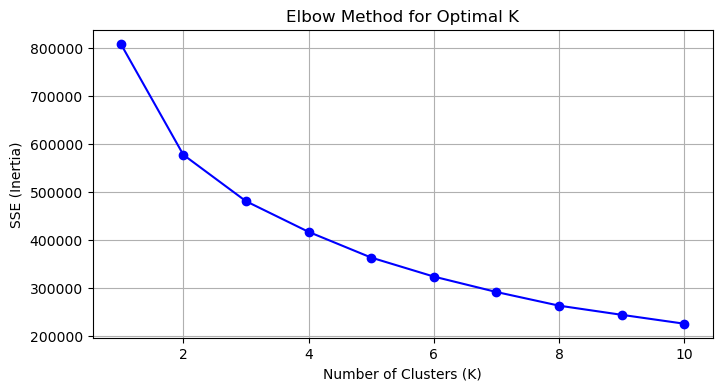

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


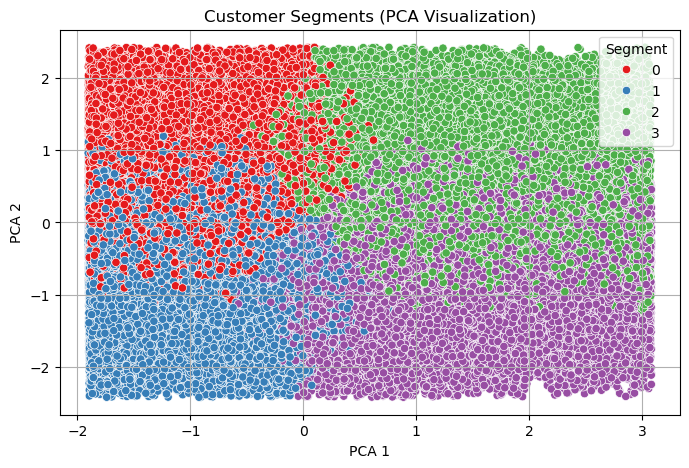

,Total Value,Quantity,Age,Recency,Segment
0,36,3,37,1102,1
1,1872,4,37,558,3
2,576,2,37,479,1
3,196,1,37,1036,1
4,449,1,49,1021,0


In [2]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv(r"C:\Users\shash\Downloads\ecommerce_customer_data_custom_ratios - Copy.csv")
df.columns = df.columns.str.strip()

print("Columns:", df.columns.tolist())

df.drop(['Customer Name', 'Customer ID'], axis=1, inplace=True, errors='ignore')

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
df['Total Value'] = df['Product Price'] * df['Quantity']

df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['Payment Method', 'Product Category', 'Gender'], drop_first=True)

df['Recency'] = (df['Purchase Date'].max() - df['Purchase Date']).dt.days

features = ['Total Value', 'Quantity', 'Age', 'Recency']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# 📊 Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, sse, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['Segment'], palette='Set1')
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()
df[['Total Value', 'Quantity', 'Age', 'Recency', 'Segment']].head()
